<a href="https://colab.research.google.com/github/Akshatha2004/Deep-learning/blob/main/DL_GITHUB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
#define Unit Step Function
def unitStep(v):
    if v>=0:
        return 1
    else:
        return 0

#design perceptron Model
def perceptronModel(x,w,b):
    v=np.dot(w,x)+b
    y=unitStep(v)
    return y

#NOT logic function
#wNOT=-1 ,bNOT=0.5
def NOT_logicFunction(x):
    wNOT=-1
    bNOT=0.5
    return perceptronModel(x,wNOT,bNOT)

#AND logic function
#here x1=wAND2=1,bAND=-1.5
#w2=wAND2=1
def AND_logicFunction(x):
    w=np.array([1,1])
    bAND=-1.5
    return perceptronModel(x,w,bAND)

#OR logic Fuction
#w1=1,w2=1,bOR=-0.5
def OR_logicFunction(x):
    w=np.array([1,1])
    bOR=-0.5
    return perceptronModel(x,w,bOR)

#XOR logic function
#with AND ,OR, and NOT
#FUNCTION calls in sequence
def XOR_logicFunction(x):
    y1=AND_logicFunction(x)
    y2=OR_logicFunction(x)
    y3=NOT_logicFunction(y1)
    final_x=np.array([y2,y3])
    finalOutput=AND_logicFunction(final_x)
    return finalOutput

#testing the perceptron mODEL
test1=np.array([0,1])
test2=np.array([1,1])
test3=np.array([0,0])
test4=np.array([1,0])

print("XOR ({},{})={}".format(0,1,XOR_logicFunction(test1)))
print("XOR ({},{})={}".format(1,1,XOR_logicFunction(test2)))
print("XOR ({},{})={}".format(0,0,XOR_logicFunction(test3)))
print("XOR ({},{})={}".format(1,0,XOR_logicFunction(test4)))

XOR (0,1)=1
XOR (1,1)=0
XOR (0,0)=0
XOR (1,0)=1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with SGD optimizer:
Epoch 1/50 - SGD Loss: 1.0684
Epoch 2/50 - SGD Loss: 1.0339
Epoch 3/50 - SGD Loss: 1.0254
Epoch 4/50 - SGD Loss: 1.0163
Epoch 5/50 - SGD Loss: 1.0095
Epoch 6/50 - SGD Loss: 1.0045
Epoch 7/50 - SGD Loss: 0.9972
Epoch 8/50 - SGD Loss: 0.9920
Epoch 9/50 - SGD Loss: 0.9882
Epoch 10/50 - SGD Loss: 0.9830
Epoch 11/50 - SGD Loss: 0.9793
Epoch 12/50 - SGD Loss: 0.9744
Epoch 13/50 - SGD Loss: 0.9712
Epoch 14/50 - SGD Loss: 0.9670
Epoch 15/50 - SGD Loss: 0.9645
Epoch 16/50 - SGD Loss: 0.9605
Epoch 17/50 - SGD Loss: 0.9572
Epoch 18/50 - SGD Loss: 0.9539
Epoch 19/50 - SGD Loss: 0.9505
Epoch 20/50 - SGD Loss: 0.9471
Epoch 21/50 - SGD Loss: 0.9446
Epoch 22/50 - SGD Loss: 0.9412
Epoch 23/50 - SGD Loss: 0.9380
Epoch 24/50 - SGD Loss: 0.9367
Epoch 25/50 - SGD Loss: 0.9316
Epoch 26/50 - SGD Loss: 0.9284
Epoch 27/50 - SGD Loss: 0.9269
Epoch 28/50 - SGD Loss: 0.9243
Epoch 29/50 - SGD Loss: 0.9213
Epoch 30/50 - SGD Loss: 0.9176
Epoch 31/50 - SGD Loss: 0.9144
Epoch 32/50 - SGD 

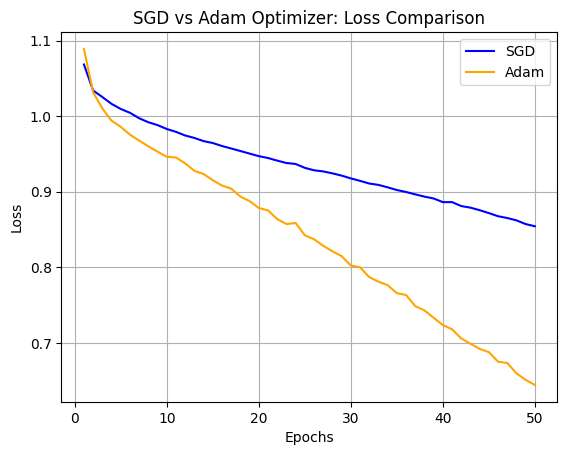

In [ ]:
#import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

# 1. Create synthetic data
def create_data():
    X = np.random.randn(1000, 10)  # 1000 samples, 10 features
    y = np.random.randn(1000, 1)   # 1000 samples, 1 target (regression task)
    return X, y

# 2. Define a simple deep neural network
def create_model():
    model = models.Sequential([
        layers.Dense(50, activation='relu', input_shape=(10,)),  # input layer with 10 features, 50 neurons
        layers.Dense(20, activation='relu'),  # hidden layer with 20 neurons
        layers.Dense(1)  # output layer (regression, single output)
    ])
    return model

# 3. Train and capture loss values, showing the loss per epoch
def train_model_with_history(model, optimizer, X, y, batch_size, epochs, optimizer_name):
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = []

    # Training loop to print loss at each epoch
    for epoch in range(epochs):
        hist = model.fit(X, y, batch_size=batch_size, epochs=1, verbose=0)
        loss = hist.history['loss'][0]
        history.append(loss)
        print(f"Epoch {epoch+1}/{epochs} - {optimizer_name} Loss: {loss:.4f}")

    return history

# 4. Compare performance of SGD and Adam
X, y = create_data()

# Create models for SGD and Adam
model_sgd = create_model()
model_adam = create_model()

# Optimizers
optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.001)

epochs = 50
batch_size = 32

print("\nTraining with SGD optimizer:")
sgd_loss = train_model_with_history(model_sgd, optimizer_sgd, X, y, batch_size, epochs, 'SGD')

print("\nTraining with Adam optimizer:")
adam_loss = train_model_with_history(model_adam, optimizer_adam, X, y, batch_size, epochs, 'Adam')

# 5. Plot the loss curves for comparison
plt.plot(range(1, epochs + 1), sgd_loss, label='SGD', color='blue')
plt.plot(range(1, epochs + 1), adam_loss, label='Adam', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD vs Adam Optimizer: Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()



Training with SGD optimizer:

Training with Adam optimizer:

Training with RMSprop optimizer:


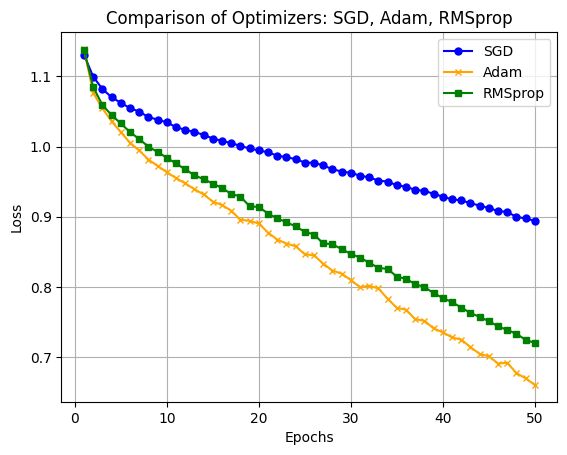

In [ ]:
#import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

# 1. Create synthetic data
def create_data():
    X = np.random.randn(1000, 10)  # 1000 samples, 10 features
    y = np.random.randn(1000, 1)   # 1000 samples, 1 target (regression task)
    return X, y

# 2. Define a simple deep neural network
def create_model():
    model = models.Sequential([
        layers.Dense(50, activation='relu', input_shape=(10,)),  # input layer with 10 features, 50 neurons
        layers.Dense(20, activation='relu'),  # hidden layer with 20 neurons
        layers.Dense(1)  # output layer (regression, single output)
    ])
    return model

# 3. Train and capture loss values, showing the loss per epoch
# Modification: Train the model once for all epochs and capture the loss
def train_model_with_history(model, optimizer, X, y, batch_size, epochs, optimizer_name):
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model once for all epochs and capture the loss values
    history = model.fit(X, y, batch_size=batch_size, epochs=epochs, verbose=0)

    print(f"\nTraining with {optimizer_name} optimizer:")

    # Return the loss values for plotting
    return history.history['loss']

# 4. Compare performance of SGD, Adam, and RMSprop
X, y = create_data()

# Create models for SGD, Adam, and RMSprop
model_sgd = create_model()
model_adam = create_model()
model_rmsprop = create_model()

# Optimizers
optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.001)
optimizer_rmsprop = optimizers.RMSprop(learning_rate=0.001)  # Added RMSprop optimizer

epochs = 50
batch_size = 32

# Training with SGD optimizer
sgd_loss = train_model_with_history(model_sgd, optimizer_sgd, X, y, batch_size, epochs, 'SGD')

# Training with Adam optimizer
adam_loss = train_model_with_history(model_adam, optimizer_adam, X, y, batch_size, epochs, 'Adam')

# Training with RMSprop optimizer
rmsprop_loss = train_model_with_history(model_rmsprop, optimizer_rmsprop, X, y, batch_size, epochs, 'RMSprop')  # Added training for RMSprop

# 5. Plot the loss curves for comparison
# Modification: Added markers for better visualization
plt.plot(range(1, epochs + 1), sgd_loss, label='SGD', color='blue', marker='o', markersize=5, linestyle='-')  # Added markers
plt.plot(range(1, epochs + 1), adam_loss, label='Adam', color='orange', marker='x', markersize=5, linestyle='-')  # Added markers
plt.plot(range(1, epochs + 1), rmsprop_loss, label='RMSprop', color='green', marker='s', markersize=5, linestyle='-')  # Added RMSprop plot with markers

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Optimizers: SGD, Adam, RMSprop')
plt.legend()
plt.grid(True)
plt.show()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 31ms/step - accuracy: 0.8969 - loss: 0.3253 - val_accuracy: 0.9838 - val_loss: 0.0516
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9857 - loss: 0.0439 - val_accuracy: 0.9902 - val_loss: 0.0305
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9899 - loss: 0.0317 - val_accuracy: 0.9887 - val_loss: 0.0327
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9924 - loss: 0.0231 - val_accuracy: 0.9882 - val_loss: 0.0355
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9946 - loss: 0.0172 - val_accuracy: 0.9911 - val_loss: 0.0299
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9895 - loss: 0.0346
Test accuracy:0.991100013256073


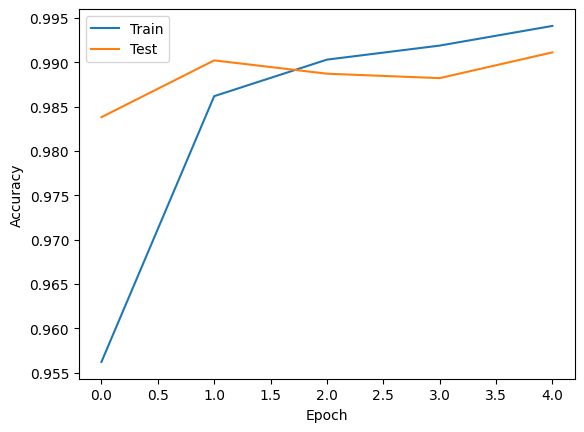

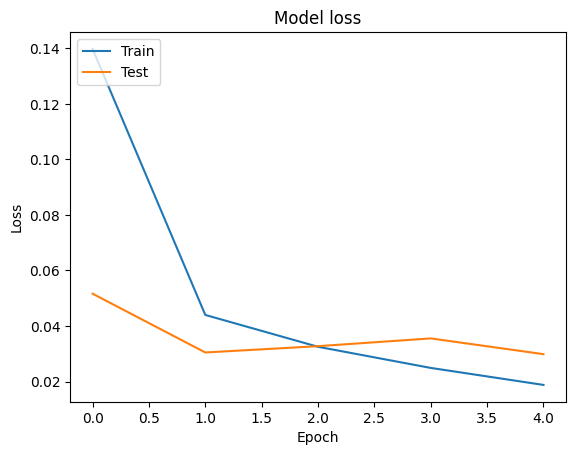

In [ ]:




#Convolution Neural Networks

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels)=datasets.mnist.load_data()
train_images=train_images.reshape(train_images.shape[0], 28,28,1).astype('float32')/255
test_images=test_images.reshape(test_images.shape[0], 28,28,1).astype('float32')/255

model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2,)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f"Test accuracy:{test_acc}")

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 35ms/step - accuracy: 0.8857 - loss: 0.3702 - val_accuracy: 0.9836 - val_loss: 0.0510
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 32ms/step - accuracy: 0.9820 - loss: 0.0569 - val_accuracy: 0.9882 - val_loss: 0.0350
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9883 - loss: 0.0391 - val_accuracy: 0.9908 - val_loss: 0.0296
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9904 - loss: 0.0309 - val_accuracy: 0.9906 - val_loss: 0.0279
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9917 - loss: 0.0261 - val_accuracy: 0.9924 - val_loss: 0.0253
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9897 - loss: 0.0301
Test accuracy: 0.9923999905586243


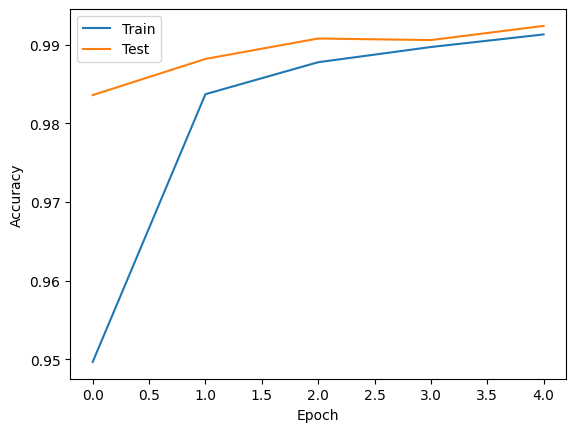

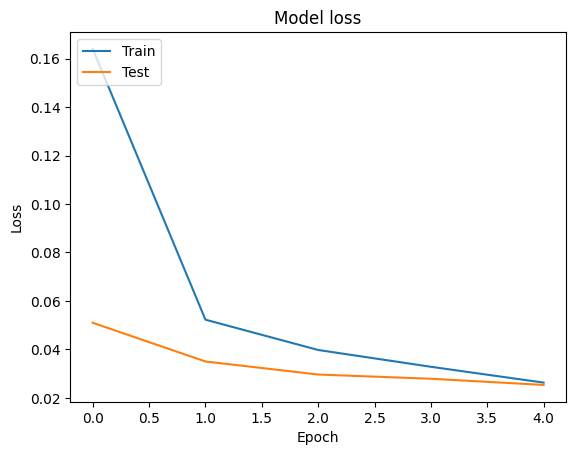

In [10]:
# Convolutional Neural Network (CNN) for MNIST classification

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Pixel values were not normalized.
# Modification: Normalize pixel values to the range [0, 1] for better training stability
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255  # Normalize pixel values
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255  # Normalize pixel values

# 2. Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # No dropout layer for regularization.
    # Modification: Add a Dropout layer to prevent overfitting
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #Modification: Introduce Dropout layer after second Conv2D and MaxPooling layers
    layers.Dropout(0.25),  # Dropout layer added with 25% rate

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    # The output layer used softmax activation.
    #  clarification.
    # **Clarification**: Output layer uses `softmax` for multi-class classification
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes (digits 0-9)
])

# 3. Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 4. Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# 5. Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# 6. Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')  # Training accuracy
plt.plot(history.history['val_accuracy'], label='val_accuracy')  # Validation accuracy
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7. Plot the training and validation loss
plt.plot(history.history['loss'], label='loss')  # Training loss
plt.plot(history.history['val_loss'], label='val_loss')  # Validation loss
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
